In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [3]:
import os
import torch.nn as nn
import torch.optim as optimizers
import torch.nn.functional as F 

In [4]:
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

In [7]:
root = os.path.join('data', 'mnist')
transform = transforms.Compose([transforms.ToTensor(),
                                lambda x: x.view(-1)])
mnist_train =torchvision.datasets.MNIST(root=root,
                                      download=True,
                                      train=True,
                                      transform=transform)
mnist_test =torchvision.datasets.MNIST(root=root,
                                      download=True,
                                      train=False,
                                      transform=transform)
train_dataloader = DataLoader(mnist_train,
                              batch_size=100,
                              shuffle=True)
test_dataloader = DataLoader(mnist_test,
                              batch_size=1,
                              shuffle=False)


0it [00:00, ?it/s]


  5%|███▊                                                                  | 540672/9912422 [00:17<04:53, 31881.82it/s]


 11%|███████▌                                                             | 1081344/9912422 [00:33<04:36, 31927.82it/s]


 16%|███████████▎                                                         | 1622016/9912422 [00:50<04:19, 31952.08it/s]


 22%|███████████████                                                      | 2162688/9912422 [01:07<04:02, 31911.20it/s]


 27%|██████████████████▊                                                  | 2703360/9912422 [01:24<03:46, 31892.90it/s]


 33%|██████████████████████▌                                              | 3244032/9912422 [01:41<03:28, 31965.48it/s]


 38%|██████████████████████████▎                                          | 3784704/9912422 [01:58<03:12, 31871.20it/s]


 44%|██████████████████████████████                                       | 4325376/9912422 [02:15<02:54, 31950.20it/s]


 49%|█████████████████████████████████▊                                   | 4866048/9912422 [02:31<02:37, 32029.43it/s]


 55%|█████████████████████████████████████▋                               | 5414912/9912422 [02:49<02:20, 31970.11it/s]


 60%|█████████████████████████████████████████▍                           | 5955584/9912422 [03:06<02:03, 32075.87it/s]


 66%|█████████████████████████████████████████████▏                       | 6496256/9912422 [03:22<01:41, 33749.10it/s]


 71%|████████████████████████████████████████████████▉                    | 7036928/9912422 [03:39<01:29, 31956.08it/s]


 76%|████████████████████████████████████████████████████▋                | 7577600/9912422 [03:56<01:13, 31912.84it/s]


 82%|████████████████████████████████████████████████████████▌            | 8118272/9912422 [04:13<00:56, 31926.12it/s]


 87%|████████████████████████████████████████████████████████████▎        | 8658944/9912422 [04:30<00:39, 31940.85it/s]


 93%|████████████████████████████████████████████████████████████████     | 9199616/9912422 [04:47<00:21, 32914.61it/s]


 98%|███████████████████████████████████████████████████████████████████▊ | 9740288/9912422 [05:03<00:05, 32223.10it/s]


100%|████████████████████████████████████████████████████████████████████▉| 9912320/9912422 [05:09<00:00, 32017.99it/s]
9920512it [05:09, 32043.25it/s]                                                                                        


Extracting data\mnist\MNIST\raw\train-images-idx3-ubyte.gz to data\mnist\MNIST\raw



0it [00:00, ?it/s]


  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 52485.06it/s]                                                                                          

0it [00:00, ?it/s]

Extracting data\mnist\MNIST\raw\train-labels-idx1-ubyte.gz to data\mnist\MNIST\raw



 33%|██████████████████████▉                                               | 540672/1648877 [00:17<00:32, 33967.41it/s]


 66%|█████████████████████████████████████████████▎                       | 1081344/1648877 [00:33<00:17, 32004.25it/s]


 98%|███████████████████████████████████████████████████████████████████▉ | 1622016/1648877 [00:50<00:00, 31922.22it/s]


100%|████████████████████████████████████████████████████████████████████▉| 1646592/1648877 [00:51<00:00, 31939.67it/s]
1654784it [00:51, 32133.74it/s]                                                                                        

0it [00:00, ?it/s]

Extracting data\mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to data\mnist\MNIST\raw



8192it [00:00, 21224.56it/s]                                                                                           


Extracting data\mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\mnist\MNIST\raw
Processing...
Done!


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
device

device(type='cuda')

In [9]:
train_dataloader

In [10]:
class AutoEncoder(nn.Module):
    def __init__(self,device='cpu'):
        super().__init__()
        self.device=device
        self.l1=nn.Linear(784,200)
        self.l2=nn.Linear(200,784)
    
    def forward(self,x):
        h=self.l1(x)
        h=torch.relu(h)
        h=self.l2(h)
        y=torch.sigmoid(h)
        return y
    
    

In [15]:
model=AutoEncoder(device=device).to(device)
criterion=nn.BCELoss()
optimizer=optimizers.Adam(model.parameters())

In [17]:
model

AutoEncoder(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (l2): Linear(in_features=200, out_features=784, bias=True)
)

In [18]:
epochs=10

for epoch in range(epochs):
    train_loss=0
    for (x,_) in train_dataloader:
        x=x.to(device)
        model.train()
        
        preds=model(x)
        
        loss=criterion(preds,x)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        train_loss+=loss.item()
    
    train_loss/=len(train_dataloader)
    print('Epoch: {}, Loss: {:.3f}'.format(
        epoch+1,
        train_loss))
    

Epoch: 1, Loss: 0.153
Epoch: 2, Loss: 0.085
Epoch: 3, Loss: 0.074
Epoch: 4, Loss: 0.071
Epoch: 5, Loss: 0.069
Epoch: 6, Loss: 0.068
Epoch: 7, Loss: 0.067
Epoch: 8, Loss: 0.067
Epoch: 9, Loss: 0.066
Epoch: 10, Loss: 0.066


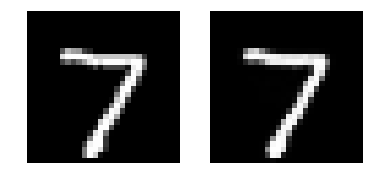

In [27]:
x,_=next(iter(test_dataloader))

x=x.to(device)
model.eval()
x_rec=model(x)

for i, image in enumerate([x, x_rec]):
    image = image.view(28, 28).detach().cpu().numpy()
    plt.subplot(1, 2, i+1)
    plt.imshow(image, cmap='binary_r')
    plt.axis('off')
plt.show()